## Types of Plagiarism

Each text file is associated with one **Task** (task A-E) and one **Category** of plagiarism, which you can see in the above DataFrame.

###  Tasks, A-E

Each text file contains an answer to one short question; these questions are labeled as tasks A-E. For example, Task A asks the question: "What is inheritance in object oriented programming?"

### Categories of plagiarism 

Each text file has an associated plagiarism label/category:

**1. Plagiarized categories: `cut`, `light`, and `heavy`.**
* These categories represent different levels of plagiarized answer texts. `cut` answers copy directly from a source text, `light` answers are based on the source text but include some light rephrasing, and `heavy` answers are based on the source text, but *heavily* rephrased (and will likely be the most challenging kind of plagiarism to detect).
     
**2. Non-plagiarized category: `non`.** 
* `non` indicates that an answer is not plagiarized; the Wikipedia source text is not used to create this answer.
    
**3. Special, source text category: `orig`.**
* This is a specific category for the original, Wikipedia source text. We will use these files only for comparison purposes.

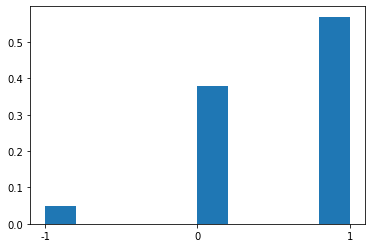

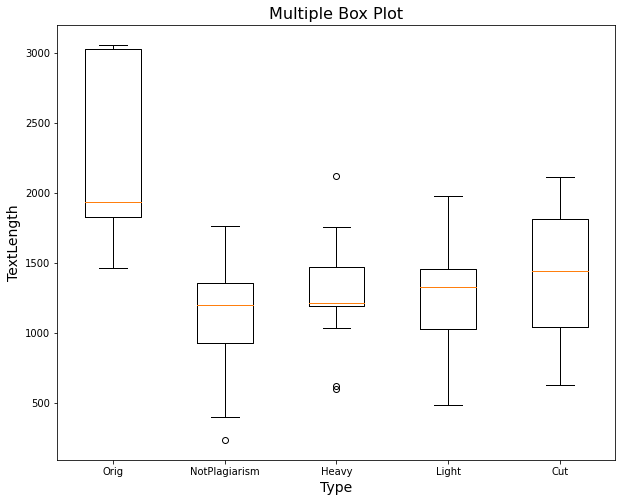


KeyboardInterrupt



In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first rows of data info
plagiarism_df.head()
def addPlagiarismClass(category):
    if category == -1:
        return -1
    elif  category == 0:
        return 0
    else:
        return 1

dictPlagiarismToInt= { "non": 0,"heavy": 1,"light": 2,"cut" : 3, "orig":-1}                                                        
plagiarism_df['Category'] = plagiarism_df['Category'].apply(lambda x: dictPlagiarismToInt[x])
plagiarism_df['Class'] = plagiarism_df['Category'].apply(lambda x: addPlagiarismClass(x))


plt.hist(sorted(plagiarism_df.Class.astype(str)),weights=np.ones(len(plagiarism_df.Class)) / len(plagiarism_df.Class))
# check work
# check that all categories of plagiarism have a class label = 1
plagiarism_df.head(10)
import helpers 

# create a text column 
plagiarism_df = helpers.create_text_column(plagiarism_df)
plagiarism_df['Length'] = plagiarism_df['Text'].apply(lambda x: len(x))

orig = plagiarism_df[plagiarism_df['Category']==-1]
notPlag = plagiarism_df[plagiarism_df['Category']==0]
heavy = plagiarism_df[plagiarism_df['Category']==1]
light = plagiarism_df[plagiarism_df['Category']==2]
cut = plagiarism_df[plagiarism_df['Category']==3]


data = [orig.Length,notPlag.Length,heavy.Length,light.Length,cut.Length]
labels = ['Orig','NotPlagiarism','Heavy','Light','Cut']
# plot the figure
plt.figure(figsize=(10, 8))
plt.boxplot(data, labels=labels)
plt.title("Multiple Box Plot", fontsize=16)
plt.xlabel("Type", fontsize=14)
plt.ylabel("TextLength", fontsize=14)
plt.savefig("box_mat6")
plt.show()

plagiarism_df = helpers.train_test_dataframe(plagiarism_df, random_seed=1)

plag = plagiarism_df[plagiarism_df['Category']!=-1]
orig = plagiarism_df[plagiarism_df['Category']==-1]
#print(plag.Task)
#plag.apply(lambda x: print(x.Task),1)
def ComputeNGrams(textPlag,orig):
    a=3
    pass
plag['nGrams'] = plag.apply(lambda x: ComputeNGrams(x['Text'],orig[orig['Task'] == x['Task']]).Text,1)



